# Student Analysis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

In [101]:
import pandas as pd 
import numpy as np
import seaborn as sns

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [15]:
df = pd.read_csv('./data/xAPI-Edu-Data.csv')
df.shape

(480, 17)

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [10]:
# Print 10 e random elements from the dataset.
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
259,M,KW,KuwaIT,lowerlevel,G-04,A,English,S,Mum,69,34,12,17,No,Bad,Above-7,L
359,F,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,75,90,51,17,Yes,Good,Under-7,H
355,M,Jordan,Jordan,lowerlevel,G-02,B,French,S,Mum,35,97,41,23,Yes,Good,Under-7,H
210,M,Jordan,SaudiArabia,MiddleSchool,G-08,C,Spanish,S,Mum,27,90,82,14,Yes,Good,Under-7,H
317,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Mum,50,90,83,13,Yes,Good,Under-7,H
83,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,7,4,10,50,No,Good,Above-7,M
316,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Mum,60,92,83,23,Yes,Good,Under-7,H
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
169,M,KW,KuwaIT,lowerlevel,G-02,B,French,S,Mum,30,12,29,23,No,Bad,Under-7,M
469,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,9,6,15,85,No,Bad,Above-7,L


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [11]:
# check for null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [14]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability

sigma = 0
df.std(axis = 0, ddof = 1)

raisedhands          30.779223
VisITedResources     33.080007
AnnouncementsView    26.611244
Discussion           27.637735
dtype: float64

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [115]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [22]:
# Select 5 columns and find out their bias
range_columns = (df.columns.get_loc("raisedhands"), df.columns.get_loc("Discussion"))
df_selected = df.iloc[:, range_columns[0]:range_columns[1]+1]
df_selected.skew()

raisedhands          0.026962
VisITedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64

## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [117]:
# Select the top 4 most correlated and put them in a different dataset
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas


def remove_self_corr(df):
    #df: unstacked correlation dataframe with multilevel index
    
    for multi_index in df.index:

        if multi_index[0] == multi_index[1]:
            df.drop(multi_index, inplace = True)

    return df

def remove_same_pairs(df):
    #df: unstacked correlation dataframe with multilevel index

    for multi_index in df.index:
        
        if multi_index[::-1] in df.index:
            df.drop(multi_index, inplace = True)

    return df

print(df.corr())

print("aaaaa", df.corr().unstack())
df_corr_most = df.corr().unstack()
df_corr_most_sorted = df_corr_most.sort_values()

df_corr_most = remove_self_corr(df_corr_most_sorted)
df_corr_most = remove_same_pairs(df_corr_clean)

display(df_corr_most)
display(df_corr_clean.nlargest(4))

df_corr_most = df_corr_clean.nlargest(4).unstack()
df_corr_most

                   raisedhands  VisITedResources  AnnouncementsView  \
raisedhands           1.000000          0.691572           0.643918   
VisITedResources      0.691572          1.000000           0.594500   
AnnouncementsView     0.643918          0.594500           1.000000   
Discussion            0.339386          0.243292           0.417290   

                   Discussion  
raisedhands          0.339386  
VisITedResources     0.243292  
AnnouncementsView    0.417290  
Discussion           1.000000  
aaaaa raisedhands        raisedhands          1.000000
                   VisITedResources     0.691572
                   AnnouncementsView    0.643918
                   Discussion           0.339386
VisITedResources   raisedhands          0.691572
                   VisITedResources     1.000000
                   AnnouncementsView    0.594500
                   Discussion           0.243292
AnnouncementsView  raisedhands          0.643918
                   VisITedResources  

Discussion         VisITedResources     0.243292
                   raisedhands          0.339386
                   AnnouncementsView    0.417290
AnnouncementsView  VisITedResources     0.594500
                   raisedhands          0.643918
VisITedResources   raisedhands          0.691572
dtype: float64

VisITedResources   raisedhands          0.691572
AnnouncementsView  raisedhands          0.643918
                   VisITedResources     0.594500
Discussion         AnnouncementsView    0.417290
dtype: float64

,raisedhands,VisITedResources,AnnouncementsView
VisITedResources,0.691572,NaN,NaN
AnnouncementsView,0.643918,0.5945,NaN
Discussion,NaN,NaN,0.41729


In [103]:
# Select the top 4 least correlated and create a new dataset without them
df_corr_least = df.corr().unstack()
df_corr_least_sorted = df_corr_least.sort_values()

df_corr_least = remove_self_corr(df_corr_least_sorted)
df_corr_least = remove_same_pairs(df_corr_clean)

print(df_corr_least)
print("\nLeast correlated:\n\n", df_corr_clean.nsmallest(4))

VisITedResources   Discussion           0.243292
Discussion         VisITedResources     0.243292
raisedhands        Discussion           0.339386
Discussion         raisedhands          0.339386
AnnouncementsView  Discussion           0.417290
Discussion         AnnouncementsView    0.417290
VisITedResources   AnnouncementsView    0.594500
AnnouncementsView  VisITedResources     0.594500
raisedhands        AnnouncementsView    0.643918
AnnouncementsView  raisedhands          0.643918
raisedhands        VisITedResources     0.691572
VisITedResources   raisedhands          0.691572
dtype: float64

Least correlated:

 Discussion         VisITedResources     0.243292
                   raisedhands          0.339386
                   AnnouncementsView    0.417290
AnnouncementsView  VisITedResources     0.594500
dtype: float64


In [100]:
# for index in df_corr_most_sorted.index:
#     print(index[::-1])

## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


<AxesSubplot:>

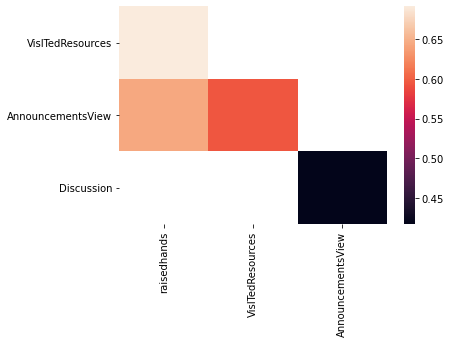

In [113]:
# Plot the correlation among themself for the previous 4 variables.
xticks = df_corr_most.columns
sns.heatmap(df_corr_most)

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


In [3]:
# make 4 plot where you plot each of the variables with the class

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [ ]:
# compute the probability

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [ ]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [ ]:
# Bayes time

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.